In [104]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn
import sklearn
from scipy import stats
import scipy

In [105]:
data=pd.read_csv('D:\REPO_progetto\TesiBiomedica\ERP_SUB',header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,261,262,263,264,265,266,267,268,269,270
0,epochs_1-epo.fif,Animali,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,epochs_1-epo.fif,Uomini,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,epochs_2-epo.fif,Animali,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,epochs_2-epo.fif,Uomini,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,epochs_4-epo.fif,Animali,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [106]:
#elimino le prime due colonne 
data.drop(data.columns[0], axis=1, inplace=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.head()

,2,3,4,5,6,7,8,9,10,11,...,261,262,263,264,265,266,267,268,269,270
0,-0.160141,-0.125426,-0.106573,-0.095095,-0.091029,-0.069748,-0.046371,-0.043094,-0.032259,-0.001245,...,-0.235281,-0.265519,-0.309145,-0.328534,-0.359613,-0.385610,-0.394247,-0.392418,-0.411500,-0.421206
1,0.047744,0.026293,0.017957,0.021190,0.011729,-0.003821,-0.025260,-0.037525,-0.037516,-0.045217,...,-0.254461,-0.254013,-0.255682,-0.262205,-0.259558,-0.232320,-0.223093,-0.223084,-0.211410,-0.220349
2,-0.026694,-0.066588,-0.066975,0.046482,0.118679,0.127005,0.181460,0.129232,0.099907,0.144923,...,-0.342489,-0.412722,-0.378892,-0.384511,-0.420109,-0.464766,-0.426704,-0.347167,-0.295815,-0.200058
3,0.029168,0.065381,0.057637,-0.062285,-0.150145,-0.148228,-0.124404,-0.093445,-0.106196,-0.089565,...,0.960847,0.974537,1.000000,0.996834,0.999565,0.958478,0.911210,0.897387,0.872463,0.882848
4,-0.299590,-0.287230,-0.194026,-0.149032,-0.124823,-0.142696,-0.209465,-0.069586,0.080486,0.073727,...,-0.952257,-0.945174,-0.887842,-0.914772,-0.822240,-0.697577,-0.599426,-0.639034,-0.660664,-0.675160


In [107]:
#trasformo i dati in matrice numpy 
tab=np.array(data)

In [108]:
#ottengo gli indici 
Adx=np.arange(0,59,2)
Bdx=np.arange(1,60,2)

In [109]:
#ottengo i vettori animali e uomini
vett_animali=[tab[i]  for  i in Adx]
vett_uomini= [tab[i]  for  i in Bdx]

In [110]:
len(vett_animali)

30

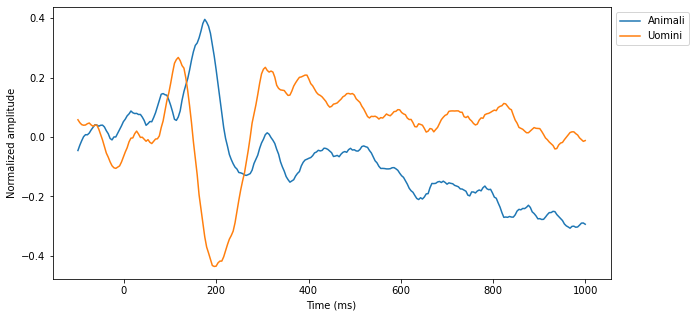

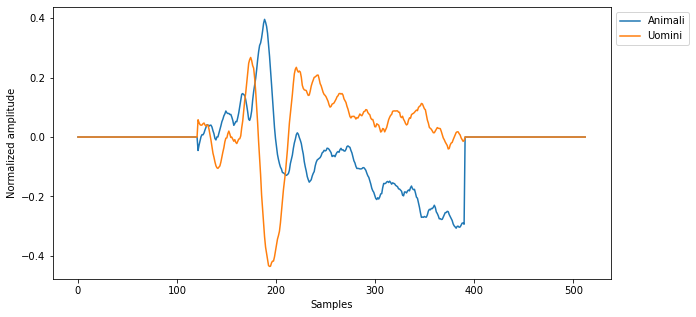

In [111]:
#Calcolo la media 
animali=0
uomini=0

for  i in range(29):
    animali=animali+vett_animali[i]
    uomini=uomini+vett_uomini[i]
    
animali=animali/30
uomini=uomini/30

#plotto i risultati Non croppati 
plt.figure(figsize = (10, 5))
x=np.linspace(-100,1000,269)
plt.plot(x,animali, label='Animali')
plt.plot(x,uomini, label ='Uomini')
plt.xlabel('Time (ms)')
plt.ylabel('Normalized amplitude')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')


#Eseguo zero padding per arrivare a 2^9
animali_p=np.pad(animali,(121,122), mode='constant')
uomini_p =np.pad(uomini,(121,122), mode='constant')

plt.figure(figsize = (10, 5))
x_p=np.linspace(0,512,512)
plt.plot(x_p,animali_p, label='Animali')
plt.plot(x_p,uomini_p, label ='Uomini')
plt.xlabel('Samples')
plt.ylabel('Normalized amplitude')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

In [112]:
#paddo anche tutti gli altri vettori 
vett_animali_p=[np.pad(i,(121,122), mode='constant')for  i in vett_animali]
vett_uomini_p=[np.pad(i,(121,122), mode='constant')for  i in vett_uomini]

In [140]:
from kymatio.numpy import Scattering1D
#Scattering Wavelet 
T = animali_p.shape[-1]
J = 6
Q = 8
print(T,J,Q)
scattering = Scattering1D(J, T, Q)

512 6 8


Text(0.5, 1.0, 'Uomini-2')

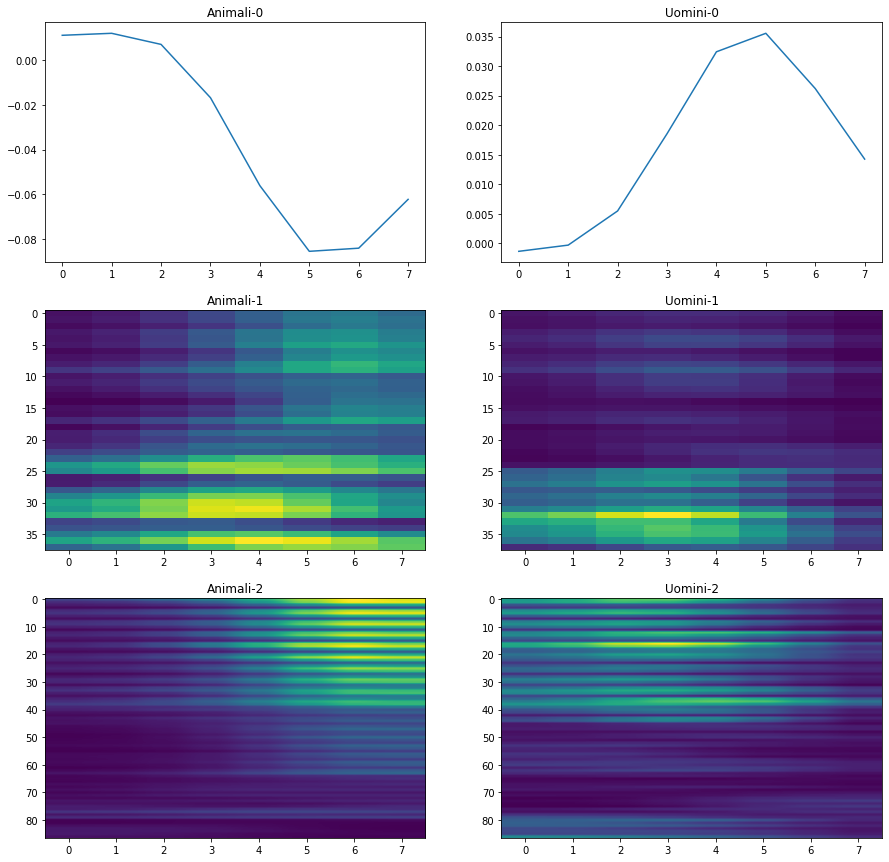

In [141]:
#calcolo coefficienti Scattering --> ERP mediati 

Sc_animali_m = scattering(animali_p)
Sc_uomini_m= scattering(uomini_p)

meta = scattering.meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

#PLOTTO I RISULTATI
fig, axs = plt.subplots(3, 2,figsize=(15,15))
##############################################
axs[0, 0].plot(Sc_animali_m[order0][0])
axs[0, 0].set_title('Animali-0')
##############################################
axs[1, 0].imshow(Sc_animali_m[order1],aspect='auto')
axs[1, 0].set_title('Animali-1')
##############################################
axs[2, 0].imshow(Sc_animali_m[order2],aspect='auto')
axs[2, 0].set_title('Animali-2')
##############################################
axs[0, 1].plot(Sc_uomini_m[order0][0])
axs[0, 1].set_title('Uomini-0')
##############################################
axs[1, 1].imshow(Sc_uomini_m[order1],aspect='auto')
axs[1, 1].set_title('Uomini-1')
##############################################
axs[2, 1].imshow(Sc_uomini_m[order2],aspect='auto')
axs[2, 1].set_title('Uomini-2')
##############################################

In [142]:
vett_Sc_animali_m = [scattering(i)for i in vett_animali_p]
vett_Sc_uomini_m  = [scattering(i)for  i in vett_uomini_p]

In [143]:
#CONTROLLO LE DIMENSIONALITA'

print(vett_Sc_animali_m[0].shape)

print(vett_Sc_animali_m[0][order0].shape)
print(vett_Sc_animali_m[0][order1].shape)
print(vett_Sc_animali_m[0][order2].shape)
print("##################################")
print(Sc_animali_m.shape)
print(Sc_animali_m[order0].shape)
print(Sc_animali_m[order1].shape)
print(Sc_animali_m[order2].shape)

(126, 8)
(1, 8)
(38, 8)
(87, 8)
##################################
(126, 8)
(1, 8)
(38, 8)
(87, 8)


In [144]:
#creo i vettori training e test
Vett_V_a=[np.concatenate((i[order1].mean(axis=1),i[order2].mean(axis=1)),axis=0)for  i in vett_Sc_animali_m]
vett_V_u=[np.concatenate((i[order1].mean(axis=1),i[order2].mean(axis=1)),axis=0)for  i in vett_Sc_uomini_m]

In [145]:
#Lo salvo come pandas 
df1 = pd.DataFrame (Vett_V_a)
df2 = pd.DataFrame (vett_V_u)
frames = [df1, df2]
features = pd.concat(frames)

In [146]:
#applico PCA
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(features) 


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc 9','pc 10'])


principalDf.head()

,pc 9,pc 10
0,-2.967608,0.570185
1,0.875850,-1.418981
2,14.870904,-2.446742
3,-10.740941,-2.930483
4,6.891110,2.886213


In [147]:
a_type=np.zeros(30, dtype=int)
b_type=np.ones(30, dtype=int)
label=np.concatenate((a_type,b_type))

In [148]:
from sklearn import svm
#cross validation scores
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, features, label, cv=10)

print(len(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),scores.std()))

10
0.58 accuracy with a standard deviation of 0.17


In [80]:
from sklearn import svm
X = [V_A,V_U] 
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [81]:
pred_a=clf.predict(Vett_V_a)
pred_u=clf.predict(vett_V_u)

In [82]:
a=0;
u=0;
for i in range(30):
    if (pred_a[i]==0):
        a=a+1;
    if (pred_u[i]==1):
        u=u+1;
acc_a=a/30;
acc_u=u/30;

print("Riconoscimento animali:",acc_a)
print("Riconoscimento uomini:",acc_u)


Riconoscimento animali: 0.3
Riconoscimento uomini: 0.9


In [83]:
#Lo salvo come pandas 
df1 = pd.DataFrame (Vett_V_a)
df2 = pd.DataFrame (vett_V_u)
frames = [df1, df2]
df = pd.concat(frames)

In [84]:
a_type=np.zeros(30, dtype=int)
b_type=np.ones(30, dtype=int)
type=np.concatenate((a_type,b_type))
df.insert(0, "Type", type ,True)
df.head(35)

,Type,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,0,0.000504,0.000454,0.000459,0.000835,0.000908,0.001084,0.000445,0.000731,0.001230,...,0.000038,0.000029,0.000043,0.000026,0.000023,0.000023,0.000019,0.000021,0.000033,0.000059
1,0,0.002220,0.001937,0.001384,0.003064,0.003677,0.003384,0.001448,0.001195,0.003167,...,0.000033,0.000028,0.000040,0.000025,0.000016,0.000008,0.000006,0.000016,0.000020,0.000019
2,0,0.002475,0.002351,0.002022,0.003822,0.004399,0.003641,0.001753,0.001645,0.004179,...,0.000056,0.000047,0.000058,0.000022,0.000021,0.000016,0.000026,0.000026,0.000049,0.000061
3,0,0.001266,0.000933,0.000696,0.001541,0.001819,0.001248,0.000675,0.000667,0.001247,...,0.000017,0.000015,0.000018,0.000012,0.000009,0.000007,0.000008,0.000008,0.000012,0.000008
4,0,0.001386,0.001227,0.001105,0.002147,0.001974,0.001673,0.000919,0.000803,0.001882,...,0.000047,0.000053,0.000079,0.000014,0.000016,0.000022,0.000019,0.000025,0.000011,0.000009
5,0,0.001129,0.000890,0.000706,0.001401,0.002191,0.001414,0.000605,0.000691,0.001147,...,0.000045,0.000021,0.000029,0.000027,0.000020,0.000031,0.000020,0.000024,0.000018,0.000029
6,0,0.000858,0.000759,0.000432,0.001169,0.001067,0.000975,0.000684,0.000997,0.002345,...,0.000026,0.000034,0.000043,0.000021,0.000015,0.000012,0.000018,0.000022,0.000011,0.000016
7,0,0.000855,0.000723,0.000606,0.001228,0.001157,0.000905,0.000536,0.000685,0.001499,...,0.000031,0.000018,0.000026,0.000021,0.000021,0.000020,0.000022,0.000022,0.000017,0.000023
8,0,0.000917,0.000694,0.000650,0.001146,0.001587,0.001410,0.000730,0.000662,0.001247,...,0.000029,0.000023,0.000032,0.000017,0.000016,0.000011,0.000015,0.000009,0.000013,0.000026
9,0,0.000821,0.000682,0.000711,0.001253,0.001593,0.002280,0.000900,0.000880,0.002076,...,0.000015,0.000022,0.000033,0.000012,0.000012,0.000010,0.000007,0.000003,0.000004,0.000012


In [85]:
label= np.array(df['Type'])

In [86]:
features= df.drop('Type', axis = 1)

In [87]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, label, test_size = 0.25, random_state = 42)

In [88]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (45, 125)
Training Labels Shape: (45,)
Testing Features Shape: (15, 125)
Testing Labels Shape: (15,)


In [89]:
from sklearn import svm
X = train_features 
y = train_labels
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [90]:
pred=clf.predict(test_features)

In [91]:
a=0;
u=0;
for i in range(len(test_features)):
    if(test_labels[i]==pred[i]):
        a=a+1;

acc=a/len(test_features);
print(acc)

0.4
